In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sys

# Functions

In [2]:
def rmse(img1, img2):
    return np.sqrt(((img1-img2)** 2).mean())

In [3]:
# https://github.com/AllenInstitute/render-python-apps/blob/master/renderapps/intensity_correction/deconvtools.py
from scipy.fftpack import ifftn
def otf2psf(otf, psf_size):
    # calculate psf from otf with size <= otf size
    
    if otf.any(): # if any otf element is non-zero
        # calculate psf     
        psf = ifftn(otf)
        # this condition depends on psf size    
        num_small = np.log2(otf.shape[0])*4*np.spacing(1)    
        if np.max(abs(psf.imag))/np.max(abs(psf)) <= num_small:
            psf = psf.real 
        
        # circularly shift psf
        psf = np.roll(psf, int(np.floor(psf_size[0]/2)), axis=0)    
        psf = np.roll(psf, int(np.floor(psf_size[1]/2)), axis=1) 
        
        # crop psf
        psf = psf[0:psf_size[0], 0:psf_size[1]]
    else: # if all otf elements are zero
        psf = np.zeros(psf_size)
    return psf

In [4]:
def recover_kernel(img, blurred_img, size):
    y = np.fft.fftshift(np.fft.fft2(blurred_img))
    x = np.fft.fftshift(np.fft.fft2(img))
    A = np.eye(img.shape[0])
    A = cv2.resize(A, (img.shape[1], img.shape[0]))
    A = np.fft.fftshift(np.fft.fft2(A))
    a = x.conj()*x+0.0002*A.conj()*A
    x_ls_img = x.conj()*y/a
    x_ls_img = np.abs(otf2psf(x_ls_img, size))
    return x_ls_img

In [5]:
# for Donald Grayscale
def recover_from2d_plot(img, blurred_img, kernel):
    plt.figure(figsize=(20,12))
    for i in range(4):
        filtered_img = recover_kernel(img, blurred_img[i], kernel[i].shape)
        print(f'RMSE donald_1_blur_kernel{i+1}', rmse(filtered_img, kernel[i]))
        plt.subplot(2,2,i+1)
        plt.title(f'kernel {i+1}')
        plt.xticks([])
        plt.yticks([])
        plt.imshow(filtered_img, cmap='gray')
        plt.imsave(path+f'outputs/P5/part_e/donald_1_blur_kernel{i+1}.png', filtered_img, cmap='gray')
    plt.savefig(path+f'outputs/P5/part_e/donald_1_kernels.png')
    plt.show()

In [6]:
# for Donald RGB
def recover_from3d_plot(img, blurred_img):
    plt.figure(figsize=(20,12))
    for i in range(4):
        filtered_img = []
        for j in range(3):
            fil = recover_kernel(img[:,:,j], blurred_img[i][:,:,j], kernel[i].shape)
            fil = fil/np.max(fil)*255
            print(f'RMSE donald_2_blur_kernel {i+1}_channel {j+1}', rmse(fil, kernel[i]))
            filtered_img.append(fil)
        filtered_img = np.dstack(filtered_img)
        filtered_img = cv2.cvtColor(filtered_img.astype('uint8'), cv2.COLOR_BGR2RGB)
        plt.subplot(2,2,i+1)
        plt.title(f'kernel {i+1}')
        plt.xticks([])
        plt.yticks([])
        plt.imshow(filtered_img, cmap='gray')
        plt.imsave(path+f'outputs/P5/part_e/donald_2_blur_kernel_{i+1}.png', filtered_img, cmap='gray')
    plt.savefig(path+f'outputs/P5/part_e/donald_2_kernels.png')

# Importing the Data

In [7]:
path = 'F://Uni/992/Digital Image Processing/Homeworks/DIP_HW3/'

In [8]:
kernel = []
for i in range(1,5):
    img = cv2.imread(path + f'inputs/P5/kernel_{i}.png')
    kernel.append(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))

In [9]:
donald_in_car_1 = cv2.imread(path + 'inputs/P5/donald_in_car_1.png')
donald_in_car_1 = cv2.cvtColor(donald_in_car_1, cv2.COLOR_BGR2GRAY)
donald_in_car_2 = cv2.imread(path + 'inputs/P5/donald_in_car_2.png')

In [10]:
donald_gray_blur = []
for i in range(1,5):
    img = cv2.imread(path + f'outputs/P5/part_a/donald_1_blur_kernel_{i}.png')
    donald_gray_blur.append(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))

In [11]:
donald_rgb_blur = []
for i in range(1,5):
    img = cv2.imread(path + f'outputs/P5/part_a/donald_2_blur_kernel_{i}.png')
    donald_rgb_blur.append(img)

# Donald in the Car Grayscale

RMSE donald_1_blur_kernel1 66.4048900262595
RMSE donald_1_blur_kernel2 26.242386064550203
RMSE donald_1_blur_kernel3 42.16646896448953
RMSE donald_1_blur_kernel4 37.24775903655373


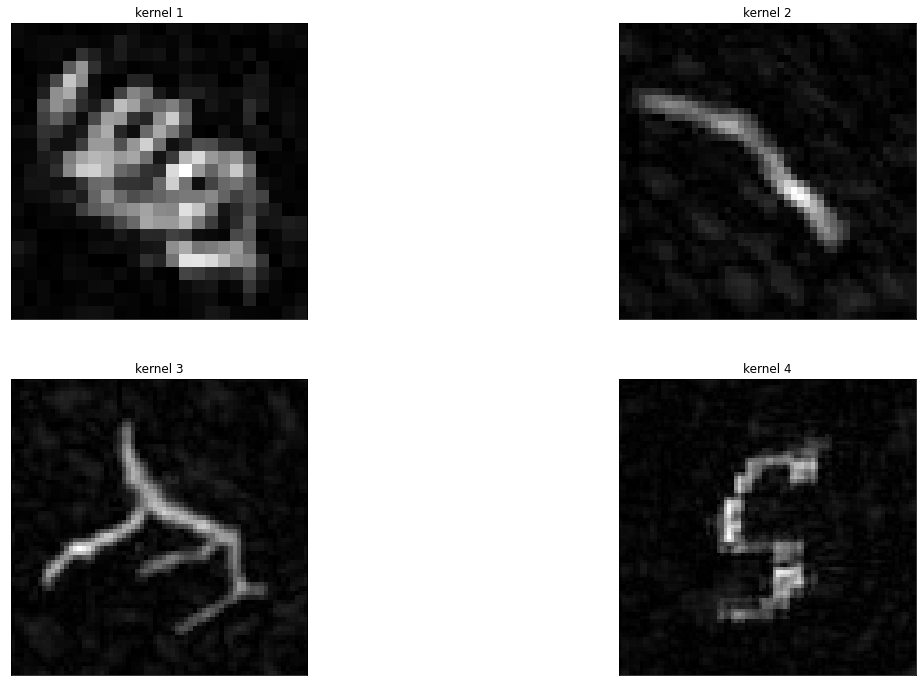

In [12]:
recover_from2d_plot(donald_in_car_1,donald_gray_blur,kernel)

# Donald in the Car RGB

RMSE donald_2_blur_kernel 1_channel 1 12.849514108681015
RMSE donald_2_blur_kernel 1_channel 2 5.3728529452013
RMSE donald_2_blur_kernel 1_channel 3 5.319974398155413
RMSE donald_2_blur_kernel 2_channel 1 6.870211874078219
RMSE donald_2_blur_kernel 2_channel 2 6.944680374486666
RMSE donald_2_blur_kernel 2_channel 3 7.685846332810047
RMSE donald_2_blur_kernel 3_channel 1 9.302931465025482
RMSE donald_2_blur_kernel 3_channel 2 6.499503616350636
RMSE donald_2_blur_kernel 3_channel 3 6.124729079026753
RMSE donald_2_blur_kernel 4_channel 1 5.374641158267251
RMSE donald_2_blur_kernel 4_channel 2 4.931340181398711
RMSE donald_2_blur_kernel 4_channel 3 3.7428208197638155


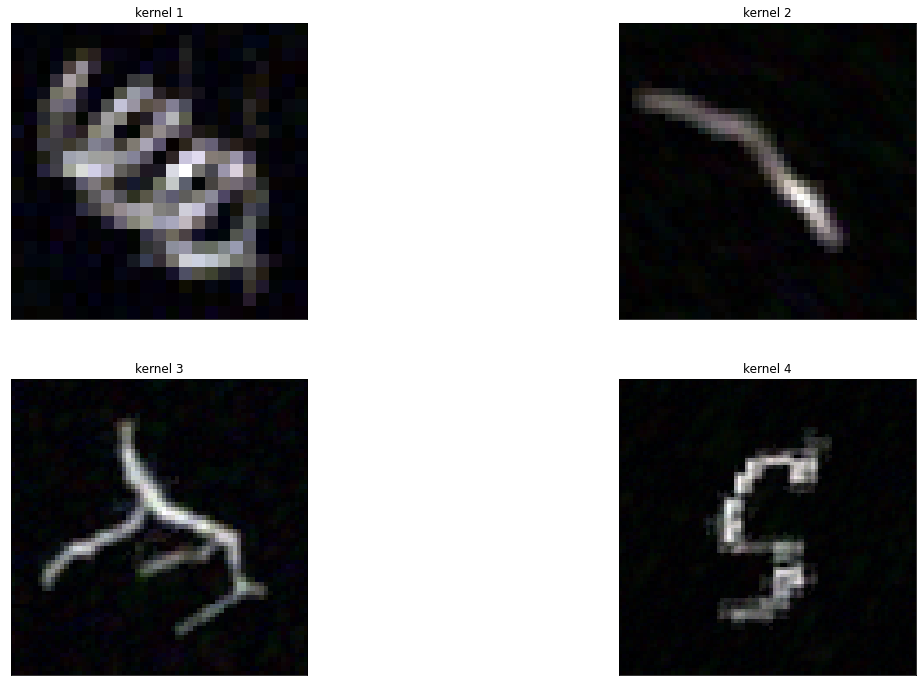

In [13]:
recover_from3d_plot(donald_in_car_2,donald_rgb_blur)